## Frame the problem and look at the big picture  
1. Define the objective in business terms.  
Objective is to predict whether a person has heart disease or not wrt some parameters
2. How will your solution be used?  
User will input health parameters and model will predict whether he/she has heart disease or not and how sure is the model
3. What are the current solutions/workarounds (if any)?  
There are many solutions for the same but as this project is for learning and doing we will consider we dont have any solutions/workarounds for now.
4. How should you frame this problem (supervised/unsupervised, online/offline, etc.)  
supervised and offline
5. How should performance be measured?
wrt accuracy and precision
6. Is the performance measure aligned with the business objective?  
Yes
7. What would be the minimum performance needed to reach the business objective?  
95%
8. What are comparable problems? Can you reuse experience or tools?  
Not yet
9. Is human expertise available?  
No
10. How would you solve the problem manually?  
11. List the assumptions you or others have made so far.  
12. Verify assumptions if possible.  

## Get the data   
Note: automate as much as possible so you can easily get fresh data.  

1. List the data you need and how much you need.
Health details of previous patients
2. Find and document where you can get that data.  
heart-disease.csv UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/heart+Disease)
3. Check how much space it will take.  
12KB
4. Check legal obligations, and get the authorization if necessary.  
Nothing as such
5. Get access authorizations.  
6. Create a workspace (with enough storage space).  
Done.
7. Get the data. 
https://archive.ics.uci.edu/ml/datasets/heart+Disease / https://www.kaggle.com/ronitf/heart-disease-uci
8. Convert the data to a format you can easily manipulate (without changing the data itself).
9. Ensure sensitive information is deleted or protected (e.g., anonymized).
10. Check the size and type of data (time series, sample, geographical, etc.).
11. Sample a test set, put it aside, and never look at it (no data snooping!). 

## Explore the data  
Note: try to get insights from a field expert for these steps.  

1. Create a copy of the data for exploration (sampling it down to a manageable size if necessary).
2. Create a Jupyter notebook to keep record of your data exploration.  
3. Study each attribute and its characteristics:  
    - Name  
    - Type (categorical, int/float, bounded/unbounded, text, structured, etc.)
    - % of missing values  
    - Noisiness and type of noise (stochastic, outliers, rounding errors, etc.)
    - Possibly useful for the task?  
    - Type of distribution (Gaussian, uniform, logarithmic, etc.)
4. For supervised learning tasks, identify the target attribute(s).
5. Visualize the data.  
6. Study the correlations between attributes.  
7. Study how you would solve the problem manually.  
8. Identify the promising transformations you may want to apply.  
9. Identify extra data that would be useful (go back to "Get the Data" on page 502).  
10. Document what you have learned.  

## Prepare the data  
Notes:    
- Work on copies of the data (keep the original dataset intact).  
- Write functions for all data transformations you apply, for five reasons:  
    - So you can easily prepare the data the next time you get a fresh dataset  
    - So you can apply these transformations in future projects  
    - To clean and prepare the test set  
    - To clean and prepare new data instances  
    - To make it easy to treat your preparation choices as hyperparameters  

1. Data cleaning:  
    - Fix or remove outliers (optional).  
    - Fill in missing values (e.g., with zero, mean, median...) or drop their rows (or columns).  
2. Feature selection (optional):  
    - Drop the attributes that provide no useful information for the task.  
3. Feature engineering, where appropriates:  
    - Discretize continuous features.  
    - Decompose features (e.g., categorical, date/time, etc.).  
    - Add promising transformations of features (e.g., log(x), sqrt(x), x^2, etc.).
    - Aggregate features into promising new features.  
4. Feature scaling: standardize or normalize features.  

## Short-list promising models  
Notes: 
- If the data is huge, you may want to sample smaller training sets so you can train many different models in a reasonable time (be aware that this penalizes complex models such as large neural nets or Random Forests).  
- Once again, try to automate these steps as much as possible.    

1. Train many quick and dirty models from different categories (e.g., linear, naive, Bayes, SVM, Random Forests, neural net, etc.) using standard parameters.  
2. Measure and compare their performance.  
    - For each model, use N-fold cross-validation and compute the mean and standard deviation of their performance. 
3. Analyze the most significant variables for each algorithm.  
4. Analyze the types of errors the models make.  
    - What data would a human have used to avoid these errors?  
5. Have a quick round of feature selection and engineering.  
6. Have one or two more quick iterations of the five previous steps.  
7. Short-list the top three to five most promising models, preferring models that make different types of errors. 

## Fine-Tune the System  
Notes:  
- You will want to use as much data as possible for this step, especially as you move toward the end of fine-tuning.   
- As always automate what you can.    

1. Fine-tune the hyperparameters using cross-validation.  
    - Treat your data transformation choices as hyperparameters, especially when you are not sure about them (e.g., should I replace missing values with zero or the median value? Or just drop the rows?).  
    - Unless there are very few hyperparamter values to explore, prefer random search over grid search. If training is very long, you may prefer a Bayesian optimization approach (e.g., using a Gaussian process priors, as described by Jasper Snoek, Hugo Larochelle, and Ryan Adams ([https://goo.gl/PEFfGr](https://goo.gl/PEFfGr)))  
2. Try Ensemble methods. Combining your best models will often perform better than running them invdividually.  
3. Once you are confident about your final model, measure its performance on the test set to estimate the generalization error.

> Don't tweak your model after measuring the generalization error: you would just start overfitting the test set.  

## Present your solution  
1. Document what you have done.  
2. Create a nice presentation.  
    - Make sure you highlight the big picture first.  
3. Explain why your solution achieves the business objective.  
4. Don't forget to present interesting points you noticed along the way.  
    - Describe what worked and what did not.  
    - List your assumptions and your system's limitations.  
5. Ensure your key findings are communicated through beautiful visualizations or easy-to-remember statements (e.g., "the median income is the number-one predictor of housing prices").  

## Launch!  
1. Get your solution ready for production (plug into production data inputs, write unit tests, etc.).  
2. Write monitoring code to check your system's live performance at regular intervals and trigger alerts when it drops.  
    - Beware of slow degradation too: models tend to "rot" as data evolves.   
    - Measuring performance may require a human pipeline (e.g., via a crowdsourcing service).  
    - Also monitor your inputs' quality (e.g., a malfunctioning sensor sending random values, or another team's output becoming stale). This is  particulary important for online learning systems.  
3. Retrain your models on a regular basis on fresh data (automate as much as possible).  

# HEART DISEASE CLASSIFICATION END TO END PROJECT


## Preparing the tools

In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [260]:
%matplotlib inline

###### Now to chose right estimator use https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html where we can select an estimator with respect to our data

For our classification model, which has less than 100k samples we can check out

In [261]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [262]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [263]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_roc_curve

In [264]:
data_set = pd.read_csv("data/heart-disease.csv")

## Exploratory data analysis

In [265]:
data_set.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [266]:
data_set.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [267]:
data_set.target.value_counts()

1    165
0    138
Name: target, dtype: int64

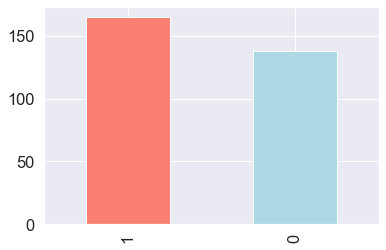

In [268]:
data_set.target.value_counts().plot(kind="bar",color =("salmon","lightblue"),)

In [269]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


###### Okay, No null or missing values 😃

In [270]:
data_set.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [271]:
data_set.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

### AGE vs SEX

In [272]:
pd.crosstab(data_set.target,data_set.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), <a list of 2 Text xticklabel objects>)

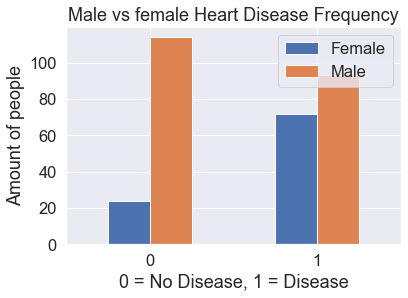

In [273]:
pd.crosstab(data_set.target,data_set.sex).plot(kind="bar")
plt.title("Male vs female Heart Disease Frequency")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount of people")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)

###### Okay, 
Since there are about 100 women and 72 of them have a postive value of heart disease being present, we might infer, based on this one variable if the participant is a woman, there's a 75% chance she has heart disease. 
As for males, there's about 200 total with around half indicating a presence of heart disease. So we might predict, if the participant is male, 50% of the time he will have heart disease.

### AGE vs THALACH (maximum heart rate) 

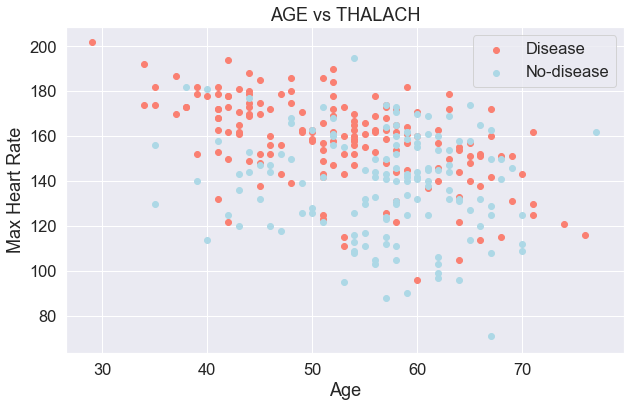

In [274]:
plt.figure(figsize=(10,6))
plt.scatter(data_set.age[data_set.target == 1], data_set.thalach[data_set.target == 1],color="salmon")
plt.scatter(data_set.age[data_set.target == 0], data_set.thalach[data_set.target == 0],color="lightblue")

plt.title("AGE vs THALACH")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No-disease"])

###### Okay,
It seems the younger someone is, the higher their max heart rate\The older someone is, the more blue dots there are. But this may be because there are more dots all together on the right side of the graph (older participants).


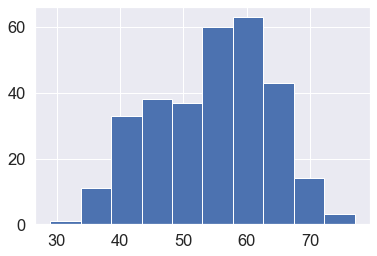

In [275]:
data_set.age.hist();

### Chest Pain CP

In [276]:
pd.crosstab(data_set.cp, data_set.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


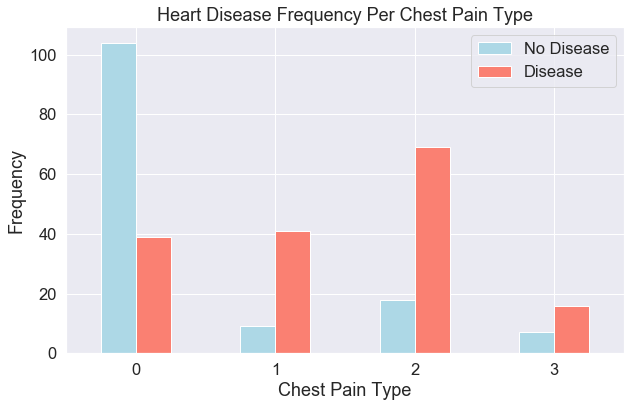

In [277]:
pd.crosstab(data_set.cp, data_set.target).plot(kind="bar", 
                                   figsize=(10,6), 
                                   color=["lightblue", "salmon"])

plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

### Finding correlation between independent variables

In [278]:
corr_matrix = data_set.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


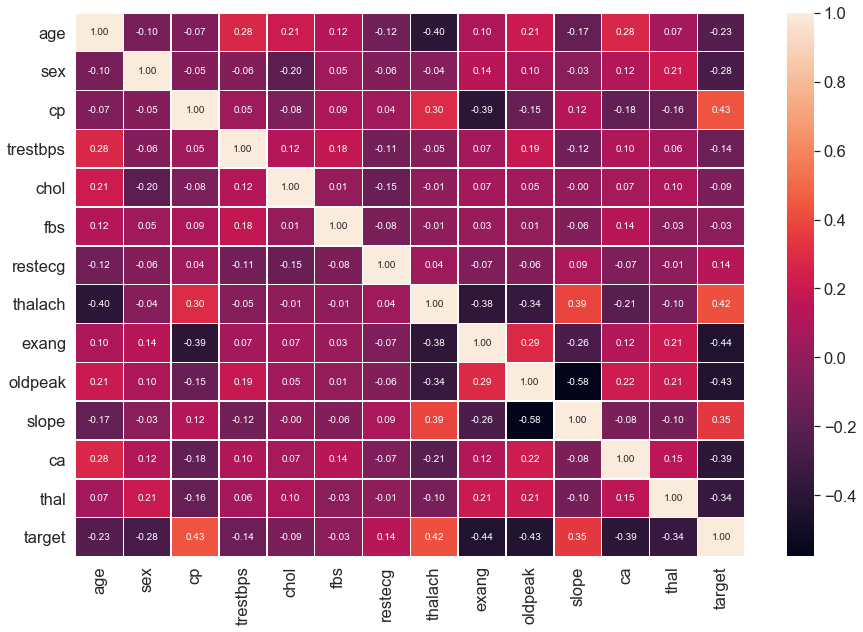

In [279]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,
           annot=True,
           linewidths=0.5,
           fmt=".02f")

###### Okay,
A higher positive value means a potential positive correlation (increase) and a higher negative value means a potential negative correlation (decrease).

In [280]:
data_set.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Modelling

In [281]:
x = data_set.drop("target",axis=1)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [282]:
x = data_set.drop("target",axis=1)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [283]:
y = data_set.target.values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [284]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [285]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [286]:
np.random.seed(42)

In [287]:
x_train, x_test, y_train , y_test = train_test_split(x, y, test_size=0.2)

In [288]:
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [289]:
len(y_train),len(y_test)

(242, 61)

In [290]:
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(),
          "Random Forest": RandomForestClassifier()
         }

In [291]:
def fitAndScore(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    
    Returns a dictionary with model_name, score
    """
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(x_train, y_train)
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [292]:
model_scores = fitAndScore(models, x_train, x_test, y_train, y_test)
model_scores

/Users/kashyap/SourceTree/learning/MajorProjects/EndToEndHeartDiseaseClassification/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.6885245901639344,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918}

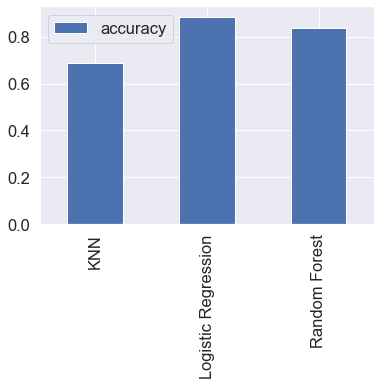

In [293]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar()

## Hyperparameter tuning and cross-validation

In [294]:
def manualTuning(x_train, y_train, x_test, y_test):
    train_scores = []
    test_scores = []
    neighbors = range(1, 21) 
    knn = KNeighborsClassifier()

    for i in neighbors:
        knn.set_params(n_neighbors = i) 
        knn.fit(x_train, y_train)
        train_scores.append(knn.score(x_train, y_train))
        test_scores.append(knn.score(x_test, y_test))
    return train_scores, test_scores

In [295]:
train_scores, test_scores = manualTuning(x_train, y_train, x_test, y_test)
train_scores, test_scores

([1.0,
  0.8099173553719008,
  0.7727272727272727,
  0.743801652892562,
  0.7603305785123967,
  0.7520661157024794,
  0.743801652892562,
  0.7231404958677686,
  0.71900826446281,
  0.6942148760330579,
  0.7272727272727273,
  0.6983471074380165,
  0.6900826446280992,
  0.6942148760330579,
  0.6859504132231405,
  0.6735537190082644,
  0.6859504132231405,
  0.6652892561983471,
  0.6818181818181818,
  0.6694214876033058],
 [0.6229508196721312,
  0.639344262295082,
  0.6557377049180327,
  0.6721311475409836,
  0.6885245901639344,
  0.7213114754098361,
  0.7049180327868853,
  0.6885245901639344,
  0.6885245901639344,
  0.7049180327868853,
  0.7540983606557377,
  0.7377049180327869,
  0.7377049180327869,
  0.7377049180327869,
  0.6885245901639344,
  0.7213114754098361,
  0.6885245901639344,
  0.6885245901639344,
  0.7049180327868853,
  0.6557377049180327])

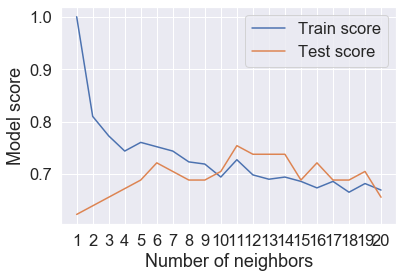

In [296]:
plt.plot(range(1, 21), train_scores, label="Train score")
plt.plot(range(1, 21), test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

### Tuning models with with [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)


In [297]:
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

## LogisticRegression

In [298]:
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

rs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


In [299]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [300]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

## RandomizedSearchCV

In [ ]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

rs_rf.fit(x_train, y_train);

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
rs_rf.best_params_

In [ ]:
rs_rf.score(x_test, y_test)

## GridSearchCV

In [ ]:
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

gs_log_reg.fit(x_train, y_train);

In [ ]:
gs_log_reg.best_params_

In [ ]:
gs_log_reg.score(x_test, y_test)

###### Okay,
GridSearchCV gave the best results.

## Evaluating a classification model, beyond accuracy

In [ ]:
y_preds = gs_log_reg.predict(x_test)
y_preds

In [ ]:
y_test

In [ ]:
y_preds[(y_preds & y_test) == False]

### ROC Curve and AUC Scores

In [ ]:
plot_roc_curve(gs_log_reg, x_test, y_test);

## Confusion matrix 


In [ ]:
print(confusion_matrix(y_test, y_preds))

In [ ]:
import seaborn as sns
sns.set(font_scale=1.5) 

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")

In [ ]:
plot_conf_mat(y_test, y_preds)

## Classification Report

In [ ]:
print(classification_report(y_test, y_preds))

## Tune the Hyperparameters

In [ ]:
gs_log_reg.best_params_

In [ ]:
clf = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")

In [ ]:
cv_acc = cross_val_score(clf,
                         x,
                         y,
                         cv=5, 
                         scoring="accuracy") 
cv_acc

In [ ]:
cv_acc = np.mean(cv_acc)
cv_acc

In [ ]:
cv_precision = np.mean(cross_val_score(clf,
                                       x,
                                       y,
                                       cv=5,
                                       scoring="precision")) 
cv_precision

In [ ]:
def getScoringFactors(scoring_factors, clf, x, y, cv_parts):
    cv_precision = []
    list = []
    i=-1
    for scoring_factor in scoring_factors:
        cv_precision.append(np.mean(cross_val_score(clf,
                                       x,
                                       y,
                                       cv=cv_parts,
                                       scoring=scoring_factor)))
        i=i+1
        return list.append(zip(scoring_factor, " : ", str(cv_precision[i])))


In [ ]:
scoring = ["accuracy", "precision", "recall", "f1"]
all_scores = getScoringFactors(scoring, clf, x , y, 5)
all_scores

## Feature importance


In [ ]:
clf.fit(x_train, y_train);
clf.coef_

In [ ]:
features_dict = dict(zip(data_set.columns, list(clf.coef_[0])))
features_dict

In [ ]:
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

###### Okay, 
What this means is doesn't matter -ve or +ve The larger the value (bigger bar) , the more the feature contributes to the models decision.

For example, the `sex` attribute has a negative value of -0.904, which means as the value for `sex` increases, the `target` value decreases.